In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
from astropy import units as u
topdir = '/global/cscratch1/sd/dstn/dr9-cosmos-subs/'
paths = glob.glob(topdir+'*')
brickname='1498p017'

In [21]:
dat = []
for path in paths:
    dat_i = fits.getdata(os.path.join(path,'tractor',brickname[:3],'tractor-'+brickname+'.fits'))
    dat.append(dat_i)

In [43]:
ratio = []
sel = np.ones(len(dat[0]),dtype=np.bool)
for i in range(len(paths)):
    if i == 0:
        continue
    c1 = SkyCoord(ra=dat[0]['ra']*u.degree, dec=dat[0]['dec']*u.degree)
    c2 = SkyCoord(ra=dat[i]['ra']*u.degree, dec=dat[i]['dec']*u.degree)
    idx1, d2d, d3d = c1.match_to_catalog_sky(c2)
    sel_i = (np.array(d2d)<1.5/3600)
    sel = sel_i&sel
    ratio.append(sel.sum()/len(d2d))

Text(0.5,0,'# of subsets matched')

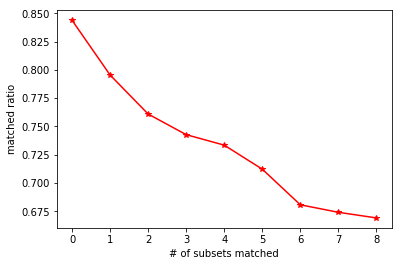

In [75]:

plt.plot(np.arange(len(ratio)),ratio,'r*-')
plt.ylabel('matched ratio')
plt.xlabel('# of subsets matched')

Text(0.5,0,'flux w1')

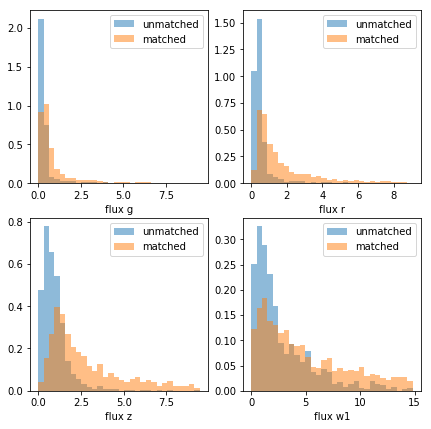

In [78]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
sel2 = (dat[0]['flux_g']<10)&(dat[0]['flux_g']>0)
#plt.gca().set_xscale('log')
p,bins,_ = plt.hist(dat[0][~sel&sel2]['flux_g'],density=True,bins=30,alpha=0.5,label='unmatched')
p,bins,_ = plt.hist(dat[0][sel&sel2]['flux_g'],density=True,bins=bins,alpha=0.5,label='matched')
plt.legend()
plt.xlabel('flux g')

plt.subplot(2,2,2)
sel2 = (dat[0]['flux_r']<10)&(dat[0]['flux_r']>0)
#plt.gca().set_xscale('log')
p,bins,_ = plt.hist(dat[0][~sel&sel2]['flux_r'],density=True,bins=30,alpha=0.5,label='unmatched')
p,bins,_ = plt.hist(dat[0][sel&sel2]['flux_r'],density=True,bins=bins,alpha=0.5,label='matched')
plt.legend()
plt.xlabel('flux r')

plt.subplot(2,2,3)
sel2 = (dat[0]['flux_z']<10)&(dat[0]['flux_z']>0)
#plt.gca().set_xscale('log')
p,bins,_ = plt.hist(dat[0][~sel&sel2]['flux_z'],density=True,bins=30,alpha=0.5,label='unmatched')
p,bins,_ = plt.hist(dat[0][sel&sel2]['flux_z'],density=True,bins=bins,alpha=0.5,label='matched')
plt.legend()
plt.xlabel('flux z')

plt.subplot(2,2,4)
sel2 = (dat[0]['flux_w1']<15)&(dat[0]['flux_w1']>0)
#plt.gca().set_xscale('log')
p,bins,_ = plt.hist(dat[0][~sel&sel2]['flux_w1'],density=True,bins=30,alpha=0.5,label='unmatched')
p,bins,_ = plt.hist(dat[0][sel&sel2]['flux_w1'],density=True,bins=bins,alpha=0.5,label='matched')
plt.legend()
plt.xlabel('flux w1')

In [129]:
best_ra = dat[0][sel]['ra']
best_dec = dat[0][sel]['dec']
flux_g = np.zeros(len(best_ra))
flux_r = np.zeros(len(best_ra))
flux_z = np.zeros(len(best_ra))
flux_w1 = np.zeros(len(best_ra))
for i in range(len(dat)):
    if i == 0:
        continue
    c1 = SkyCoord(ra=best_ra*u.degree, dec=best_dec*u.degree)
    c2 = SkyCoord(ra=dat[i]['ra']*u.degree, dec=dat[i]['dec']*u.degree)
    idx1, d2d, d3d = c1.match_to_catalog_sky(c2)
    flux_g_i = dat[i][idx1]['flux_g']
    flux_r_i = dat[i][idx1]['flux_r']
    flux_z_i = dat[i][idx1]['flux_z']
    flux_w1_i = dat[i][idx1]['flux_w1']
    flux_g+=flux_g_i
    flux_r+=flux_r_i
    flux_z+=flux_z_i
    flux_w1+=flux_w1_i
flux_g = flux_g / (len(dat)-1)
flux_r = flux_r / (len(dat)-1)
flux_z = flux_z / (len(dat)-1)
flux_w1 = flux_w1_i / (len(dat)-1)

In [135]:
flux_g_0 = dat[0][sel]['flux_g']
sel2g = (flux_g_0>0)&(flux_g_0<10)&(flux_g>0)&(flux_g<10)
gaussian_test_g = (flux_g[sel2g] -  flux_g_0[sel2g])*np.sqrt(dat[0][sel][sel2g]['flux_ivar_g'])

flux_r_0 = dat[0][sel]['flux_r']
sel2r = (flux_r_0>0)&(flux_r_0<10)&(flux_r>0)&(flux_r<10)
gaussian_test_r = (flux_r[sel2r] -  flux_r_0[sel2r])*np.sqrt(dat[0][sel][sel2r]['flux_ivar_r'])

flux_z_0 = dat[0][sel]['flux_z']
sel2z = (flux_z_0>0)&(flux_z_0<10)&(flux_z>0)&(flux_z<10)
gaussian_test_z = (flux_z[sel2z] -  flux_z_0[sel2z])*np.sqrt(dat[0][sel][sel2z]['flux_ivar_z'])

flux_w1_0 = dat[0][sel]['flux_w1']
sel2w1 = (flux_w1_0>-10)&(flux_w1_0<10)&(flux_w1>-10)&(flux_w1<10)
gaussian_test_w1 = (flux_w1[sel2w1] -  flux_w1_0[sel2w1])*np.sqrt(dat[0][sel][sel2w1]['flux_ivar_w1'])

In [148]:
gaussian_test_newg = gaussian_test_g[np.abs(gaussian_test_g)<5]
flux_g_newg = flux_g[sel2g][np.abs(gaussian_test_g)<5]

gaussian_test_newr = gaussian_test_r[np.abs(gaussian_test_r)<5]
flux_g_newr = flux_r[sel2r][np.abs(gaussian_test_r)<5]

gaussian_test_newz = gaussian_test_z[np.abs(gaussian_test_z)<5]
flux_g_newz = flux_z[sel2z][np.abs(gaussian_test_z)<5]

gaussian_test_neww1 = gaussian_test_w1[np.abs(gaussian_test_w1)<20]
flux_g_neww1 = flux_w1[sel2w1][np.abs(gaussian_test_w1)<20]

In [142]:
def get_percentile(y,x,bins,percen_num):#16,50,84
    minimum = x.min()
    maximum = x.max()
    interval = (maximum-minimum)/bins
    percent_list=[]
    mid_list = []
    for i in range(bins):
        left = minimum+i*interval
        right = minimum+(i+1)*interval
        mid = minimum+(i+0.5)*interval
        y_i = y[(x>left)&(x<=right)]
        if len(y_i)>0:
            output = np.percentile(y_i,percen_num)
            percent_list.append(output)
            mid_list.append(mid)
    return percent_list,mid_list



def one_subplot_flux(f_type,mag_truth,flux_diff):
    #flux_diff = (sim['flux_'+f_type]-sim['input_flux_'+f_type])*np.sqrt(sim['flux_ivar_'+f_type])
    y = flux_diff[(flux_diff>-10)&(flux_diff<10)]
    x = mag_truth[(flux_diff>-10)&(flux_diff<10)]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('true flux '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,60,84)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,60,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,60,16)
    plt.plot(xl,yl,color = 'y')
    
    plt.gca().set_ylim((-3,3))

    plt.ylabel(r'$\Delta$'+'Flux/'+r'$\sigma$'+' (tractor-truth)')

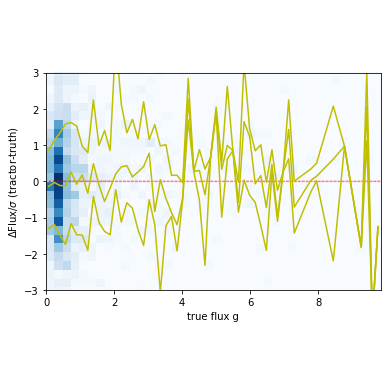

In [139]:
one_subplot_flux('g',flux_g_new, gaussian_test_new)

Text(0.5,0,'(w1flux_mean-w1flux_0)*sqrt(ivar_w1)')

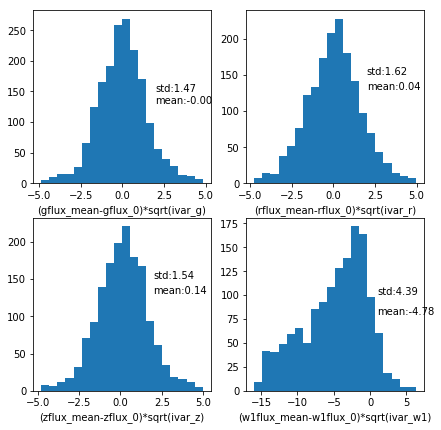

In [149]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.hist(gaussian_test_newg,bins=20)
plt.text(2,150,'std:%.2f'%gaussian_test_newg.std())
plt.text(2,130,'mean:%.2f'%gaussian_test_newg.mean())
plt.xlabel('(gflux_mean-gflux_0)*sqrt(ivar_g)')

plt.subplot(2,2,2)
plt.hist(gaussian_test_newr,bins=20)
plt.text(2,150,'std:%.2f'%gaussian_test_newr.std())
plt.text(2,130,'mean:%.2f'%gaussian_test_newr.mean())
plt.xlabel('(rflux_mean-rflux_0)*sqrt(ivar_r)')

plt.subplot(2,2,3)
plt.hist(gaussian_test_newz,bins=20)
plt.text(2,150,'std:%.2f'%gaussian_test_newz.std())
plt.text(2,130,'mean:%.2f'%gaussian_test_newz.mean())
plt.xlabel('(zflux_mean-zflux_0)*sqrt(ivar_z)')

plt.subplot(2,2,4)
plt.hist(gaussian_test_neww1,bins=20)
plt.text(1,100,'std:%.2f'%gaussian_test_neww1.std())
plt.text(1,80,'mean:%.2f'%gaussian_test_neww1.mean())
plt.xlabel('(w1flux_mean-w1flux_0)*sqrt(ivar_w1)')

##### row 0 is set 9, to row 9 is set 0, high seeing to low seeing

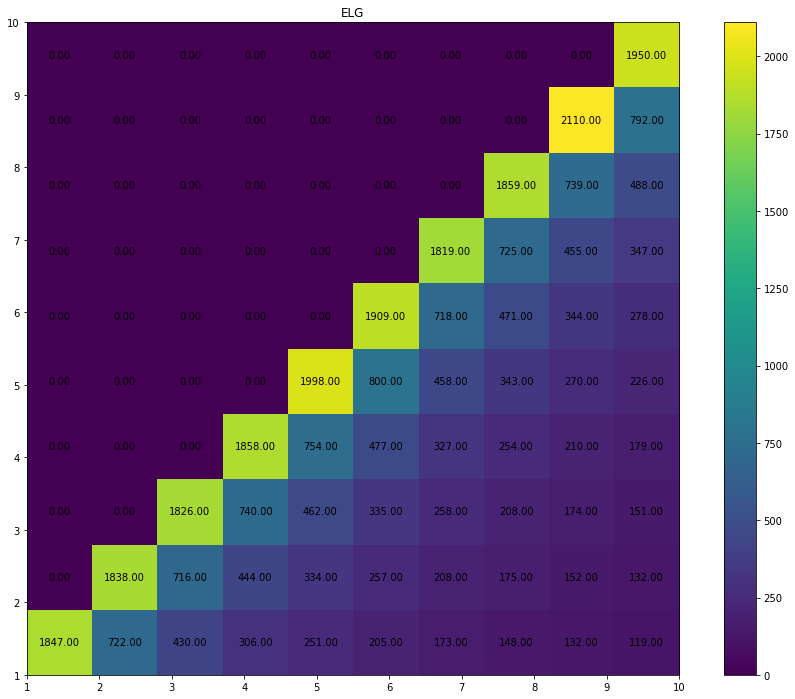

In [44]:
import tools
import imp
imp.reload(tools)
from tools import *

dat = np.loadtxt("./matrix_ELG.txt")
matrix_with_value(dat,title='ELG')

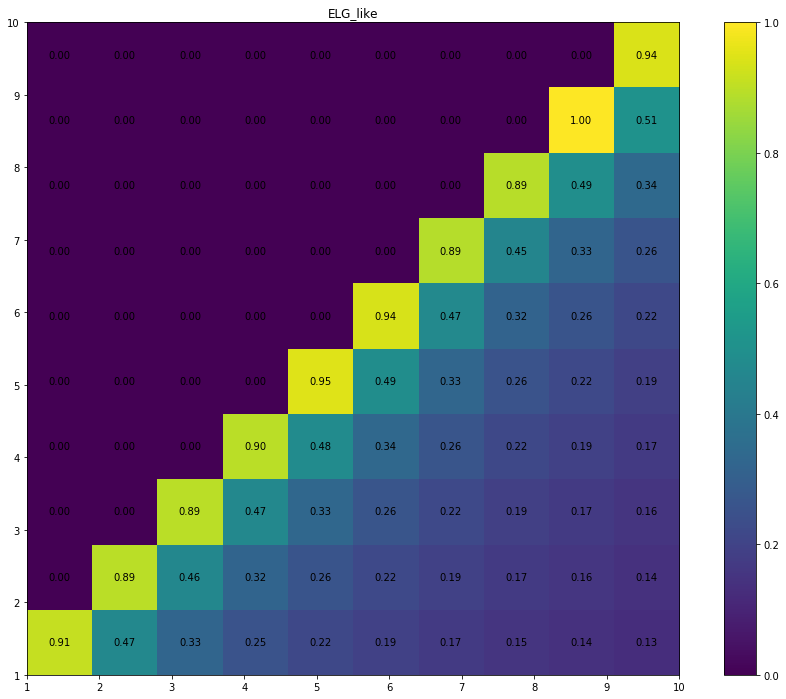

In [35]:
dat = np.loadtxt("./matrix_ELG_like.txt")
matrix_with_value(dat/dat.max(),title='ELG_like')

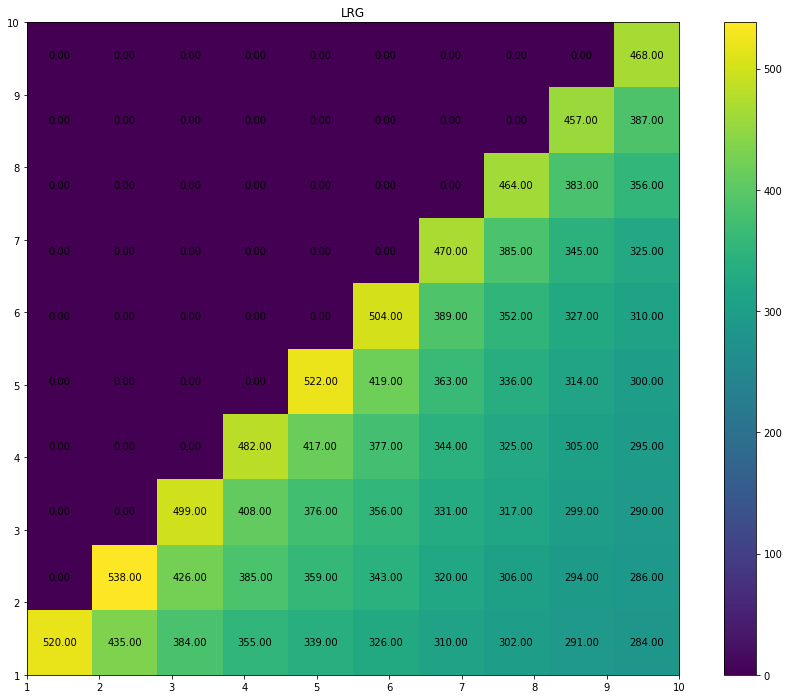

In [58]:
dat = np.loadtxt("./matrix_LRG.txt")
matrix_with_value(dat,title='LRG')


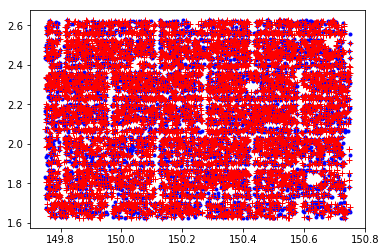

In [40]:
#this block is for testing all sets are masked to the same footprint
topdir = '/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/cosmos_subsets/'
tracer = 'ELG_like'
i=0
fn = topdir+"cosmos_%s_set%d.fits"%(tracer,i)
mask_fn = topdir+"mask_values_set%d.fits"%i
dat = fits.getdata(fn)
mask = fits.getdata(mask_fn)
sel = (mask["%d"%i]==0)
i=8
fn = topdir+"cosmos_%s_set%d.fits"%(tracer,i)
dat1 = fits.getdata(fn)
mask_fn1 = topdir+"mask_values_set%d.fits"%i
mask1 = fits.getdata(mask_fn1)
sel1 = (mask1["%d"%i]==0)
plt.plot(dat['ra'][sel],dat['dec'][sel],'b.')
plt.plot(dat1['ra'][sel1],dat1['dec'][sel1],'r+')

In [41]:
from tools import *


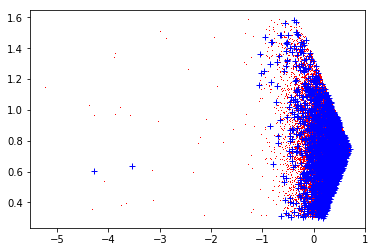

In [56]:
topdir = '/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/cosmos_subsets/'
tracer= 'ELG'
dat_list=[];mask_list=[]
for i in range(10):
            dat_list.append(fits.getdata(topdir+"cosmos_%s_set%d.fits"%(tracer,i)))
            mask_list.append(fits.getdata(topdir+"mask_values_set%d_%s.fits"%(i,tracer)))
for i in range(10):
    sel = (mask_list[i]["%d"%i]==0)
    dat = dat_list[i]
    gmag = flux2mag(dat['flux_g'][sel],dat['mw_transmission_g'][sel])
    rmag = flux2mag(dat['flux_r'][sel],dat['mw_transmission_r'][sel])
    zmag = flux2mag(dat['flux_z'][sel],dat['mw_transmission_z'][sel])
    if i == 9:
        plt.plot(gmag-rmag,rmag-zmag,'b+')
    else:
        plt.plot(gmag-rmag,rmag-zmag,'r,')

In [74]:
topdir = '/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/cosmos_subsets/cosmos_all_stacked/'
dat = fits.getdata(topdir+'cosmos_set0.fits')

In [75]:
num = []
for i in range(9):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%i)
    num_i = dat['set_%d_islrg'%i].sum()
    num.append(num_i)

In [76]:
dat['set_8_islrg'].sum()

455

In [77]:
(dat['set_9_islrg']&dat['set_9_matched']&dat['set_8_islrg']).sum()

385

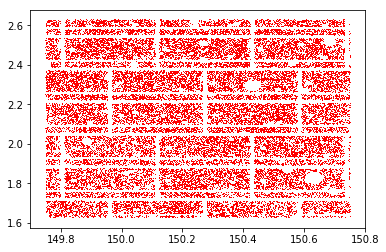

In [78]:
plt.plot(dat['ra'],dat['dec'],'r,')

In [29]:
topdir = '/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/cosmos_subsets/cosmos_all/80/1498p017.fits'
dat = fits.getdata(topdir)

In [79]:
dat.columns

ColDefs(
    name = 'BRICKNAME'; format = '8A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'TYPE'; format = '3A'
    name = 'OBJID'; format = 'J'
    name = 'EBV'; format = 'E'
    name = 'FLUX_G'; format = 'E'
    name = 'FLUX_R'; format = 'E'
    name = 'FLUX_Z'; format = 'E'
    name = 'FLUX_W1'; format = 'E'
    name = 'FLUX_W2'; format = 'E'
    name = 'FLUX_IVAR_G'; format = 'E'
    name = 'FLUX_IVAR_R'; format = 'E'
    name = 'FLUX_IVAR_Z'; format = 'E'
    name = 'FLUX_IVAR_W1'; format = 'E'
    name = 'FLUX_IVAR_W2'; format = 'E'
    name = 'MW_TRANSMISSION_G'; format = 'E'
    name = 'MW_TRANSMISSION_R'; format = 'E'
    name = 'MW_TRANSMISSION_Z'; format = 'E'
    name = 'MW_TRANSMISSION_W1'; format = 'E'
    name = 'MW_TRANSMISSION_W2'; format = 'E'
    name = 'NOBS_G'; format = 'I'
    name = 'NOBS_R'; format = 'I'
    name = 'NOBS_Z'; format = 'I'
    name = 'NOBS_W1'; format = 'I'
    name = 'NOBS_W2'; format = 'I'
    name = 'SHAPE_R'; forma

In [54]:
(dat['set_3_islrg']&dat['set_3_matched']).sum()


481

In [60]:
(dat['set_2_islrg']&dat['set_2_matched']).sum()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [57]:
0.72/0.85

0.8470588235294118

In [61]:
dat.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'